Youtube : https://www.youtube.com/watch?v=kSqxn6zGE0c&t=635s  
Kaggle : https://www.kaggle.com/code/robikscube/working-with-image-data-in-python/notebook

In [1]:
# 找到所有檔案的路徑 (資料夾中的所有檔案 會被放到list中)
import glob


cat_files = glob.glob(r"D:/Learn/OpenCV/cats_and_dogs/train/cats/*.jpg")
dog_files = glob.glob(r"D:/Learn/OpenCV/cats_and_dogs/train/dogs/*.jpg")

In [2]:
# 檢視圖片資訊
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


# 兩者功能相同
img_matplitlib_cat = plt.imread(cat_files[20])
img_cv2_cat = cv2.imread(cat_files[20])

# shape
img_matplitlib_cat.shape, img_cv2_cat.shape # (667, 1000, 3)
# (height, width, channels())

((667, 1000, 3), (667, 1000, 3))

<Axes: title={'center': 'Distrubution od Poxel Values'}, ylabel='Frequency'>

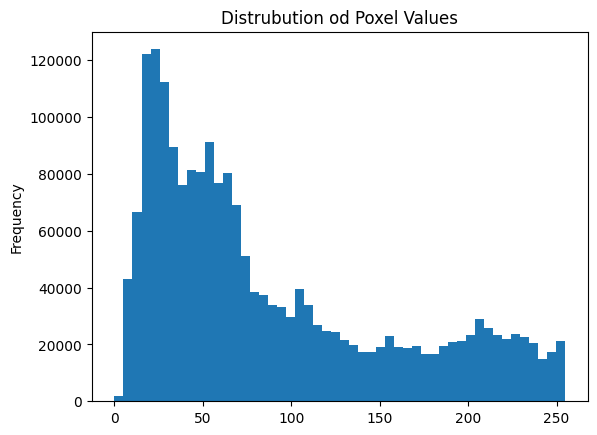

In [3]:
# 檢視圖片資訊 - 圖表呈現
import pandas as pd


pd.Series(img_matplitlib_cat.flatten()).plot(kind="hist",
                                             bins=50,
                                             title="Distrubution od Poxel Values")
# flatten 將每一個像素的RGB都攤平到一個list中
# plot 畫圖 hist 圖種類

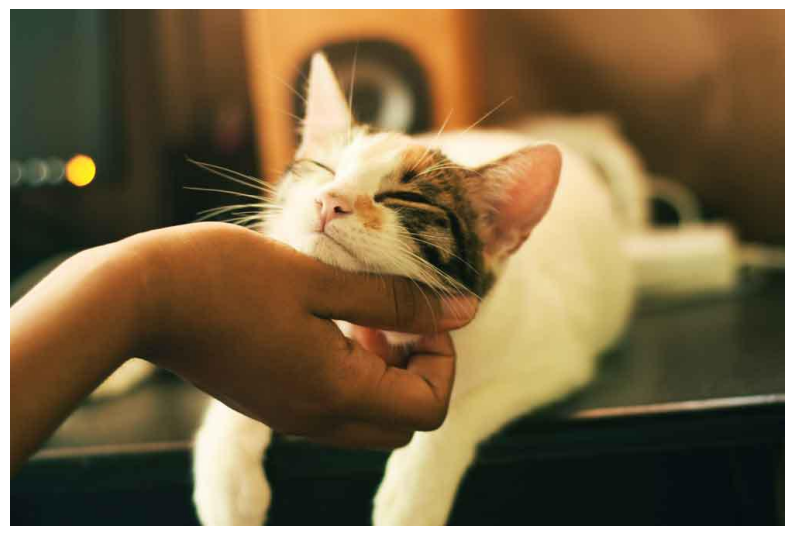

In [4]:
# 將圖畫出來
fig, ax = plt.subplots(figsize=(10, 10))
plt.axis("off")
ax.imshow(img_matplitlib_cat)

# fig 整張圖表屬性 : 圖表的大小、背景色 ....
# ax  子圖表屬性 : 這邊設定子圖表顯示一張圖片

Text(0.5, 1.0, 'Blue channle')

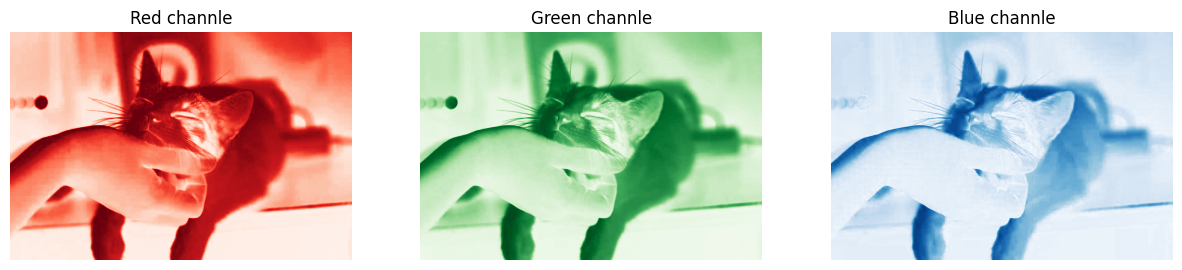

In [5]:
# 分別以RGB 通通到呈現
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img_matplitlib_cat[:,:,0], cmap="Reds")
ax[0].axis("off")
ax[0].set_title("Red channle")
# [長度範圍 : 高度範圍(上到下) : 色彩通道]
# cmap="Reds" 紅色為主色調 使圖片在 紅色至白色之間漸層
# title

ax[1].imshow(img_matplitlib_cat[:,:,1], cmap="Greens")
ax[1].axis("off")
ax[1].set_title("Green channle")

ax[2].imshow(img_matplitlib_cat[:,:,2], cmap="Blues")
ax[2].axis("off")
ax[2].set_title("Blue channle")

Text(0.5, 1.0, 'cv2_img')

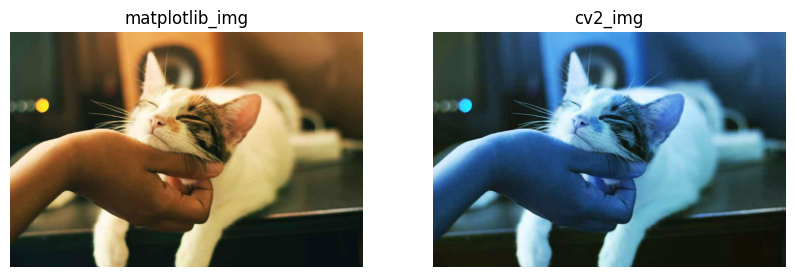

In [6]:
# Matplotlib vs cv2
# cv2 的顏色通道順序 : BGR
# mat 的顏色通道順序 : RGB
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_matplitlib_cat)
ax[0].axis("off")
ax[0].set_title("matplotlib_img")

ax[1].imshow(img_cv2_cat)
ax[1].axis("off")
ax[1].set_title("cv2_img")

(-0.5, 999.5, 666.5, -0.5)

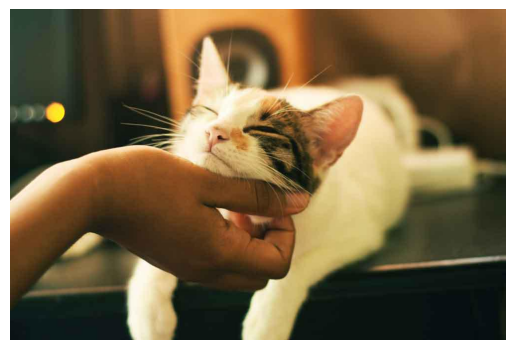

In [7]:
# 顏色通道不同的解決方法
img_cv2_cat_converted = cv2.cvtColor(img_cv2_cat, cv2.COLOR_BGR2RGB)

plt.imshow(img_cv2_cat_converted)
plt.axis("off")

(-0.5, 549.5, 308.5, -0.5)

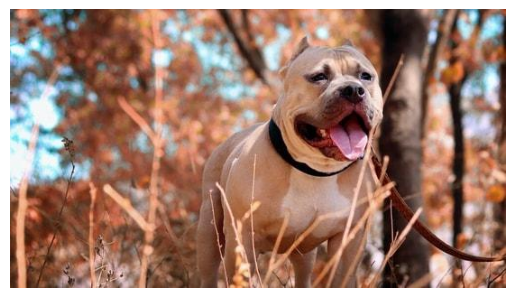

In [8]:
# IMG manipulation
img = plt.imread(dog_files[15])
plt.imshow(img)
plt.axis("off")

(-0.5, 549.5, 308.5, -0.5)

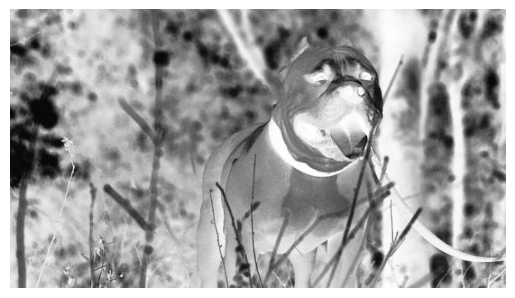

In [9]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="Greys")
plt.axis("off")

((309, 550, 3), (154, 275, 3), (72, 137, 3))

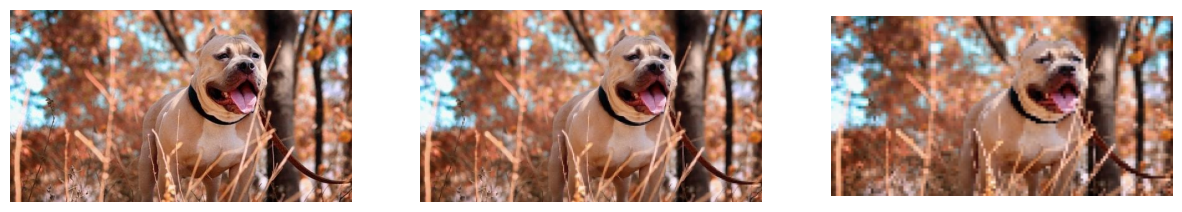

In [21]:
# Resize & Scaling

# Resize 減少像素個數 -> 畫面變模糊
img_resized_fxfy = cv2.resize(img, None, fx=0.5, fy=0.5)
img_resized_manual = cv2.resize(img, (137, 72))

fig, ax = plt.subplots(1, 3, figsize=(15,20))
ax[0].imshow(img)
ax[0].axis("off")
ax[1].imshow(img_resized_fxfy)
ax[1].axis("off")
ax[2].imshow(img_resized_manual)
ax[2].axis("off")


img.shape, img_resized.shape, img_resized_manual.shape
# cv2(長, 寬)   其他(寬, 長)

In [23]:
# 放大 需要做額外處理
# interpolation 放大時的 插值方法
img_resized_gibber = cv2.resize(img, (5000, 5000), interpolation = cv2.INTER_CUBIC)

img.shape,  img_resized_gibber.shape

((309, 550, 3), (5000, 5000, 3))

(-0.5, 549.5, 308.5, -0.5)

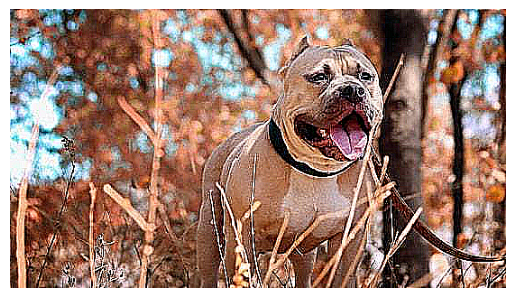

In [25]:
# Sharpen Image
import numpy as np


kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])

img_sharpen = cv2.filter2D(img, -1, kernel_sharpening)
# img 欲處理圖像
# 輸出圖像深度 -1 同原圖
# 卷積核

plt.imshow(img_sharpen)
plt.axis("off")

array([[0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2]], dtype=float32)

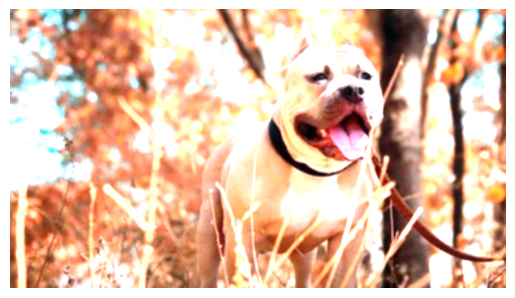

In [31]:
# Blurring Image
# 利用 np.array 準備卷積核
kernel_blurring = np.ones((3, 3), np.float32) / 5

img_blurring = cv2.filter2D(img, -1, kernel_blurring)

plt.imshow(img_blurring)
plt.axis("off")

In [36]:
# Saved Image
# 圖片 色彩通道 為 RGB
# 想使用 cv2.imwrite 需要先轉換通道 
plt.imsave("img_mpl.png", img_blurring)
cv2.imwrite("img_cv2.png", img_blurring)

True